# M.1. Homework

## Markets Foundations

### UChicago Financial Mathematics

#### September 2022

* Mark Hendricks
* hendricks@uchicago.edu

#### This assignment is not submitted, graded, or for credit. 
Rather, it is assigned for learning purposes.

# 1. Treasury Debt Composition

## Data

This assignment uses the data file `../data/treasury_quotes_2022-06-30.xlsx`.

## Note

The `ITYPE` column identifies
* 1: bonds
* 2: notes
* 4: bills
* 11: TIPS notes
* 12: TIPS bonds

The column `TDPUBOUT` lists the dollar size of the issue (public debt outstanding.)

The data source does not list the issue size for the T-bills, which is why we are not segmenting those out separately.

*Tip* `.pivot_table()` may be useful.

## 1.1
Plot the total amount of outstanding debt maturing at each date

## 1.2
Plot the amount of outstanding debt maturing at each date, segmented by bonds, notes, TIPS (combined ITYPE of 11 and 12.)

## 1.3
Report the total outstanding debt (summed over all maturity dates,) segmented by bonds, notes, TIPS.

## 1.4
Make a pie chart of this total number (reported in 1.3.) 

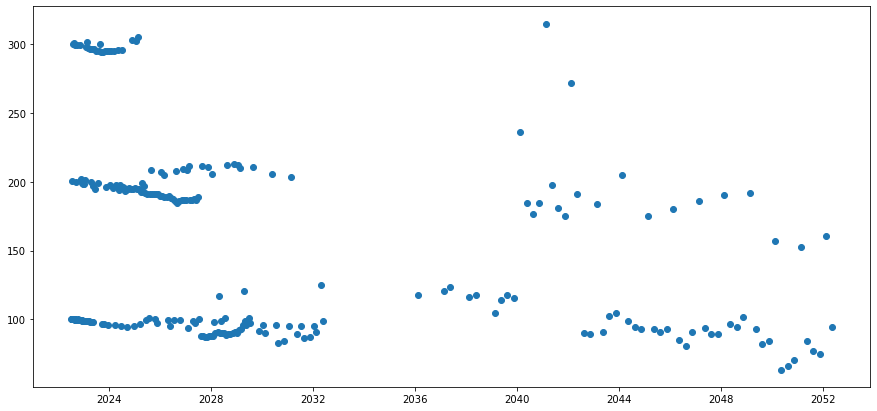

In [36]:
# Problem 1.1 Plot the total amount of outstanding debt maturing at each date

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Import data from sheet 0 in excel
df = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
# Use df.head() to see some data to ensure import worked
# df.head()

# Get all debt in numpy array
ask_price_by_mat_date = df[['tmatdt', 'tdask']].to_numpy()

# Create dictionary, with date as key and sum of tdask as value
grouped_date_dictionary = {}
for elem in ask_price_by_mat_date:
  if elem[0] not in grouped_date_dictionary:
    grouped_date_dictionary[elem[0]] = []
  grouped_date_dictionary[elem[0]].append(elem[1:])

for key in grouped_date_dictionary:
  grouped_date_dictionary[key] = [sum(i) for i in zip(*grouped_date_dictionary[key])]

# order the dictionary by date for plotting on a timeseries
ordered_data = OrderedDict(sorted(grouped_date_dictionary.items()))

# print(ordered_data)
# print(dict)

# Plot the data
date = ordered_data.keys()
value = ordered_data.values()
# print(date)

fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(date, value);
plt.scatter(date, value);

<AxesSubplot:xlabel='Maturity Date'>

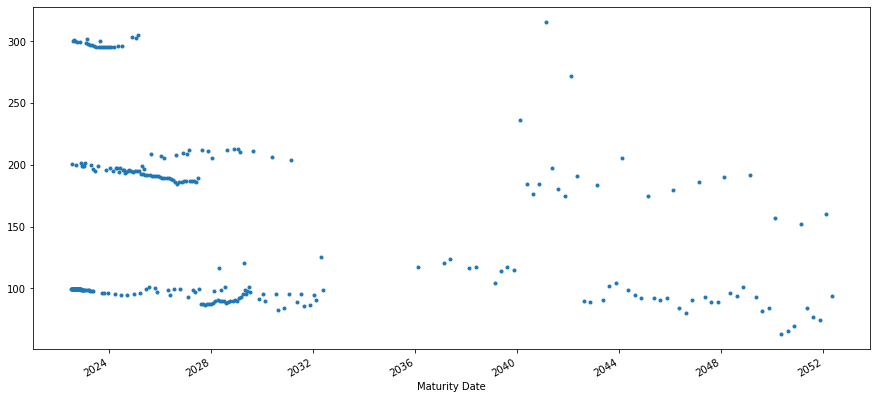

In [70]:
# Problem 1.1 Plot the total amount of outstanding debt maturing at each date
# Using Mark's example from class as a template

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)

# Data transformation
metrics = rawdata.copy()[['TMATDT', 'TDASK']]
metrics.columns = ['Maturity Date', 'Asking Price']
metrics.groupby(['Maturity Date'])['Asking Price'].sum().plot(style='.', figsize=(15,7))

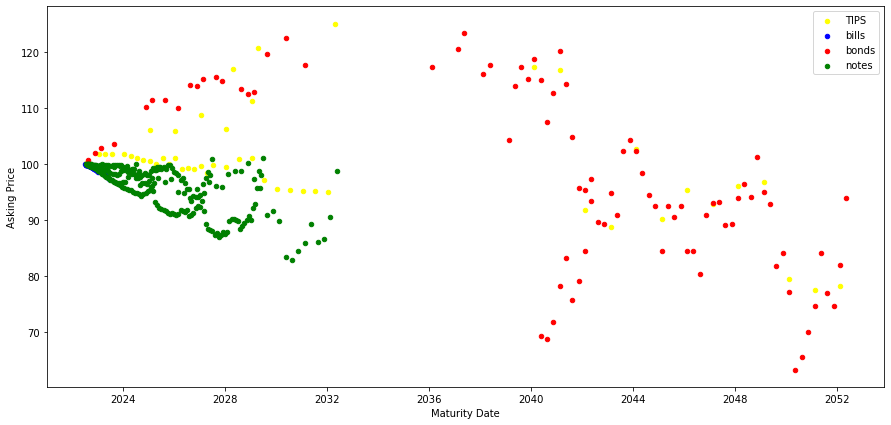

In [107]:
# Problem 1.2 Plot the amount of outstanding debt maturing at each date, 
#      segmented by bonds, notes, TIPS (combined ITYPE of 11 and 12.)

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)

# Data transformation
metrics = rawdata.copy()[['TMATDT', 'TDASK', 'ITYPE']]
metrics.columns = ['Maturity Date', 'Asking Price', 'Type']

# replace type key with value
# 1: bonds
# 2: notes
# 4: bills
# 11: TIPS notes
# 12: TIPS bonds
metrics['Type'] = metrics['Type'].replace({1:'bonds', 2:'notes', 4:'bills', 11:'TIPS', 12:'TIPS'})

# Group data by maturity date and type so you can sum, then reset index to get back to array
metrics.groupby(['Maturity Date', 'Type'])['Asking Price'].sum().reset_index().head(15)

colors = {'bonds':'red', 'notes':'green', 'bills':'blue', 'TIPS':'yellow'}
fig, ax = plt.subplots(figsize=(15,7))

# Group by type for plotting
grouped = metrics.groupby('Type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Maturity Date', y='Asking Price', label=key, color=colors[key])

plt.show()

# 2 Time-to-Maturity

## 2.1

Calculate the time-to-maturity (relative to the quote date) for each issue.

Use the `TMATDT` column to get the maturity date.

Report the summary statistics of these time-to-maturities. (Consider using .describe()).

## 2.2
Plot the time-to-maturity against the provided YTM, (column `TDYLD`.)

# 3 Yields and Prices

## 3.1

For the Treasury bills, calculate the **discount yields**.

Identify the T-bills using `ITYPE`=4 or looking for `TCOUPRT` of 0.

## 3.2

Write a function to calculate the yield-to-maturity for each issue. You will need to use a nonlinear solver to solve for the YTM.

## 3.3
Conceptual question, no outside data needed.

Consider a Treasury with...
* maturity 2 years
* face value 100
* coupon rate 4\%, semiannual
* current yield-to-maturity is 3\%


1. Calculate the price of the treasury.
1. Suppose that both its YTM and coupon rate go up by 0.5\%. What is the revised price of this Treasury?

# 4 Short-Term Rates

Use the data in `data/ref_rates.xlsx` to explore several key rates that are used as benchmarks for floating rates.
* SOFR
* Fed funds
* 3-month T-bill yield

Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)